# Procesado

- Trabajamos con imágenes de 15 arc

1) Previo a la división de imagenes uso el siguiente comando para descomprimir

        $ gzip -d *.gz

2) Carga de líbrerias necesarias para genrar imágenes (Dpx, Dpx, 3)

In [173]:
from astropy.io import fits
import os 
import shutil
import numpy as np
from astropy.nddata import Cutout2D # No incluyo WCS
from astropy.wcs import WCS #No hace falta para este problema
import matplotlib.pyplot as plt
import warnings
from astropy.utils.exceptions import AstropyWarning

3) Creo una nueva carpeta con las imágenes combinadas en los filtros H, J y K_s

In [174]:
os.makedirs("/home/vanessa/Escritorio/Doctorado/VVVx/15arcC")
#007_114547.4-594353

4) Recorto todas las imágenes con el mismo tamaño (45,45)

- Defino el centro y ancho de la imágen 

5) Genero una lista de los archivos .fist y hago algo de parsing

- Hago una lista del nombre de las fuentes 
- Luego encuentro los filtros para una dada fuente
- Recolecto los datos de es fuente y creo un nuevo hdu con los datos recortados
- Genero un nuevo .fits con dim de hduls = 3

In [175]:
warnings.simplefilter('ignore', category=AstropyWarning)
archive_fits = os.listdir('/home/vanessa/Escritorio/Doctorado/VVVx/15arc/fits_galaxies_15arcsec/')

fuentes = []

position=(21,21)
size = (45, 45)

for archive in archive_fits:
    step_0 = archive.split('_')
    step_1 = step_0[0]+'_'+step_0[1]
    fuentes.append(step_1)
    fuentes_u = list(set(fuentes))

for archive in fuentes_u:
    
    hdu_H = fits.open('/home/vanessa/Escritorio/Doctorado/VVVx/15arc/fits_galaxies_15arcsec/'+ str(archive)+'_H.fits')[1]
    wcs_H = WCS(hdu_H.header)  
    # Make the cutout, including the WCS
    cutout_H = Cutout2D(hdu_H.data, position=position, size=size, wcs=wcs_H)
    # Put the cutout image in the FITS HDU
    hdu_H.data = cutout_H.data
    # Update the FITS header with the cutout WCS
    hdu_H.header.update(cutout_H.wcs.to_header())
    primary_hdu_H = fits.PrimaryHDU(data_H)  
    
    hdu_J = fits.open('/home/vanessa/Escritorio/Doctorado/VVVx/15arc/fits_galaxies_15arcsec/'+ str(archive)+'_J.fits')[1]
    wcs_J = WCS(hdu_J.header)  
    cutout_J = Cutout2D(hdu_J.data, position=position, size=size, wcs=wcs_J)
    hdu_J.data = cutout_J.data
    hdu_J.header.update(cutout_J.wcs.to_header())
    
    hdu_Ks = fits.open('/home/vanessa/Escritorio/Doctorado/VVVx/15arc/fits_galaxies_15arcsec/'+ str(archive)+'_Ks.fits')[1]
    wcs_Ks = WCS(hdu_Ks.header)  
    cutout_Ks = Cutout2D(hdu_Ks.data, position=position, size=size, wcs=wcs_Ks)
    hdu_Ks.data = cutout_Ks.data
    hdu_Ks.header.update(cutout_Ks.wcs.to_header())
    
    hdul = fits.HDUList([primary_hdu_H, hdu_J, hdu_Ks])
    hdul.writeto('/home/vanessa/Escritorio/Doctorado/VVVx/15arcC/'+ str(archive)+'.fits')
    
news_fits = os.listdir('/home/vanessa/Escritorio/Doctorado/VVVx/15arcC/')
print(len(news_fits))

147


# Prueba con la imagen 136_115609.3-595433

In [154]:
position=(21,21)
size = (45, 45)

In [158]:
hdu_H = fits.open('/home/vanessa/Escritorio/Doctorado/VVVx/15arc/fits_galaxies_15arcsec/'+'136_115609.3-595433'+'_H.fits')[1]
print(hdu_H.data.shape)
cutout_H = Cutout2D(hdu_H.data, position=position, size=size)
data_H = cutout_H.data
print(data_H.shape)
primary_hdu_H = fits.PrimaryHDU(data_H)   

hdu_J = fits.open('/home/vanessa/Escritorio/Doctorado/VVVx/15arc/fits_galaxies_15arcsec/'+'136_115609.3-595433'+'_J.fits')[1]
print(hdu_J.data.shape)
cutout_J = Cutout2D(hdu_J.data, position=position, size=size)
hdu_J.data = cutout_J.data
print(hdu_J.data.shape)
    
hdu_Ks = fits.open('/home/vanessa/Escritorio/Doctorado/VVVx/15arc/fits_galaxies_15arcsec/'+'136_115609.3-595433'+'_Ks.fits')[1] 
print(hdu_Ks.data.shape)
cutout_Ks = Cutout2D(hdu_Ks.data, position=position, size=size)
hdu_Ks.data = cutout_Ks.data
print(hdu_Ks.data.shape)
    
hdul = fits.HDUList([primary_hdu_H, hdu_J, hdu_Ks])
hdul.writeto('/home/vanessa/Escritorio/Doctorado/VVVx/15arcC/'+'136_115609.3-595433'+'.fits')

(45, 46)
(44, 44)
(46, 46)
(44, 44)
(46, 46)
(44, 44)


In [159]:
hdul = fits.open('/home/vanessa/Escritorio/Doctorado/VVVx/15arcC/'+'136_115609.3-595433'+'.fits')

In [168]:
header_H = hdul[0].header
header_J = hdul[1].header
header_Ks = hdul[2].header
print(header_Ks)

XTENSION= 'IMAGE   '           / IMAGE extension                                BITPIX  =                  -64 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                   44 / length of data axis 1                          NAXIS2  =                   44 / length of data axis 2                          PCOUNT  =                    0 / required keyword; must = 0                     GCOUNT  =                    1 / required keyword; must = 1                     ORIGIN  = 'ESO     '                    / European Southern Observatory         DATE    = '2015-01-28T06:56:29' / file creation date (YYYY-MM-DDThh:mm:ss UT)   TELESCOP= 'VISTA   '                    / ESO Telescope Name                    INSTRUME= 'VIRCAM  '                    / Instrument used.                      OBJECT  = 'd115    '           / Original target.                               RA      =           177.708854          

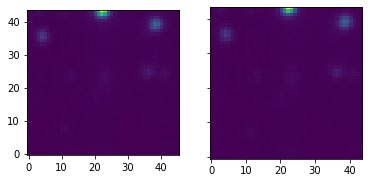

In [163]:
#plt.imshow(hdu_H.data,origin='lower')
#plt.imshow(hdul[0].data,origin='lower')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(hdu_H.data,origin='lower')

ax2.imshow(hdul[0].data,origin='lower')

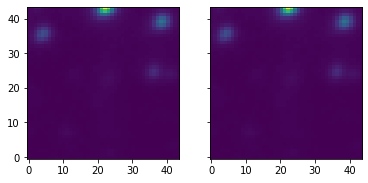

In [164]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(hdu_J.data,origin='lower')

ax2.imshow(hdul[1].data,origin='lower')

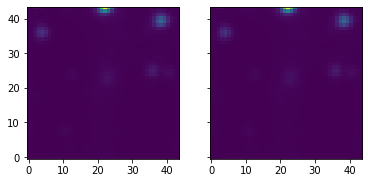

In [165]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(hdu_Ks.data,origin='lower')

ax2.imshow(hdul[2].data,origin='lower')